In [1]:
# Image Classification using CIFAR-10

In [2]:
# Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

170498071/170498071 [==============================] - 98s 1us/step


In [4]:
# Define class names for easier interpretation
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

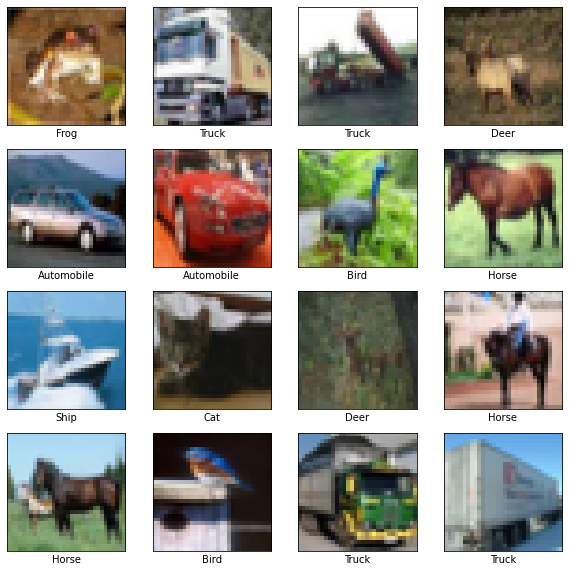

In [5]:
# Display a sample of the images from CIFAR-10
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [6]:
# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [7]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
# Train the model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    ]
)

Epoch 1/20
782/782 [==============================] - 178s 225ms/step - loss: 1.6554 - accuracy: 0.1221 - val_loss: 1.4206 - val_accuracy: 0.0545
Epoch 2/20
782/782 [==============================] - 180s 230ms/step - loss: 1.3620 - accuracy: 0.0965 - val_loss: 1.1610 - val_accuracy: 0.1080
Epoch 3/20
782/782 [==============================] - 60s 77ms/step - loss: 1.2262 - accuracy: 0.0959 - val_loss: 1.1451 - val_accuracy: 0.1044
Epoch 4/20
782/782 [==============================] - 51s 66ms/step - loss: 1.1477 - accuracy: 0.0979 - val_loss: 1.0299 - val_accuracy: 0.1284
Epoch 5/20
782/782 [==============================] - 50s 64ms/step - loss: 1.0788 - accuracy: 0.0978 - val_loss: 1.0008 - val_accuracy: 0.0981
Epoch 6/20
782/782 [==============================] - 47s 60ms/step - loss: 1.0300 - accuracy: 0.0981 - val_loss: 1.0111 - val_accuracy: 0.1041
Epoch 7/20
782/782 [==============================] - 51s 66ms/step - loss: 0.9983 - accuracy: 0.0985 - val_loss: 0.9462 - val_accur

In [10]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 4s 13ms/step - loss: 0.7610 - accuracy: 0.1072
Test accuracy: 0.1072


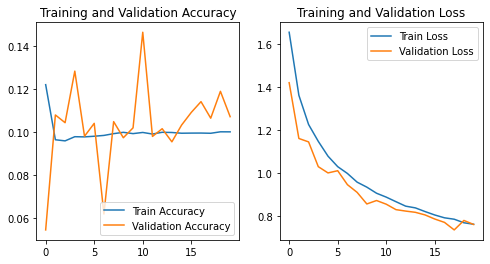

In [11]:
# Plot training history
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 34ms/step


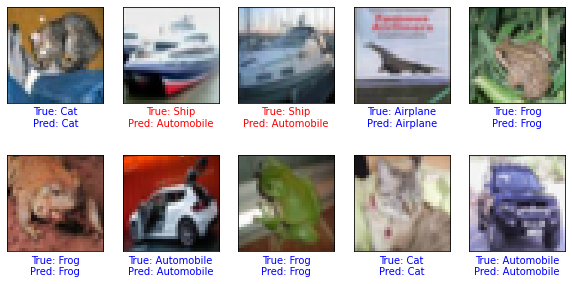

In [20]:
# Test model on a few sample images
import numpy as np
def display_sample_predictions(model, x_data, y_data, num_samples=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        img = x_data[i]
        plt.imshow(img)
        true_label = class_names[y_data[i][0]]
        pred_label = class_names[np.argmax(model.predict(np.expand_dims(img, axis=0)))]
        color = 'blue' if true_label == pred_label else 'red'
        plt.xlabel(f'True: {true_label}\nPred: {pred_label}', color=color)

display_sample_predictions(model, x_test, y_test)